<a href="https://colab.research.google.com/github/AbdulRasheed6/ML-Study-Group/blob/master/candy_production_precictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for mathematical calc i.e pandas and numpy 
import numpy as np
import pandas as pd 
#import matplotlib for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
# import minmaxscaler for standardisation
from sklearn.preprocessing import MinMaxScaler
#import tensorflow and its libraries for model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

df = pd.read_csv('candy_production.csv')

In [ ]:
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [ ]:
import datasist as ds

In [ ]:
ds.structdata.describe(df)

First five data points


,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100




Random five data points


,observation_date,IPG3113N
170,1986-03-01,78.8262
305,1997-06-01,101.5750
516,2015-01-01,109.9525
180,1987-01-01,97.1736
209,1989-06-01,90.5658




Last five data points


,observation_date,IPG3113N
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861
547,2017-08-01,114.0613




Shape of  data set: (548, 2)


Size of  data set: 1096


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
observation_date,object
IPG3113N,float64




Column(s) {'observation_date'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['IPG3113N']


Categorical Features in Data set


['observation_date']



Statistical Description of Columns


,IPG3113N
count,548.000000
mean,100.662524
std,18.052931
min,50.668900
25%,87.862475
50%,102.278550
75%,114.691900
max,139.915300




Description of Categorical Features


,count,unique,top,freq
observation_date,548,548,1989-02-01,1




Unique class Count of Categorical features


,Feature,Unique Count
0,observation_date,548




Missing Values in Data


,features,missing_counts,missing_percent
0,observation_date,0,0.0
1,IPG3113N,0,0.0


In [ ]:
# rename the columns
df.rename(columns={'observation_date' :'Month', 'IPG3113N' :'candy_production'}, inplace=True)

In [ ]:

df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')

In [ ]:
df.head()

,candy_production
Month,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


In [ ]:
df.tail()

,candy_production
Month,
2017-04-01,107.4288
2017-05-01,101.9209
2017-06-01,104.2022
2017-07-01,102.5861
2017-08-01,114.0613


<AxesSubplot:>

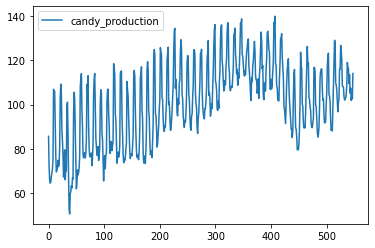

In [ ]:
#plot the distributions
df.plot()

In [ ]:
df_mean= df.rolling(window =20).mean()

<AxesSubplot:xlabel='Month'>

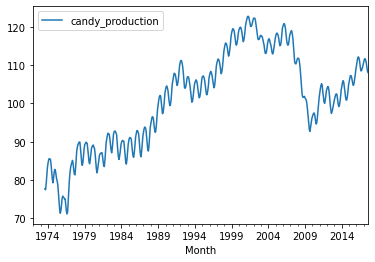

In [ ]:
df_mean.plot()

In [ ]:
df.shape

(548, 1)

In [ ]:
# split the dataset to 80 to 20%
column_indices ={name: i for i, name in  enumerate(df.columns)}

n = len(df)
train = df[0: int(n*0.8)]
test = df[int(n*0.8):]

In [ ]:
train.shape

(438, 1)

In [ ]:
test.shape

(110, 1)

In [ ]:
scaler =MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

#model generation 

In [ ]:
n_input = 24
n_features =1
generator = TimeseriesGenerator(train, train, length =n_input, batch_size=6)


model = Sequential()
model.add(LSTM(200, activation ='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()] )

model.fit_generator(generator, epochs= 350)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 69 steps
Epoch 1/350
69/69 [==============================] - 12s 176ms/step - loss: 0.0563 - mean_absolute_error: 0.1856
Epoch 2/350
69/69 [==============================] - 8s 121ms/step - loss: 0.0303 - mean_absolute_error: 0.1414
Epoch 3/350
69/69 [==============================] - 8s 113ms/step - loss: 0.0278 - mean_absolute_error: 0.1382
Epoch 4/350
69/69 [==============================] - 8s 112ms/step - loss: 0.0294 - mean_absolute_error: 0.1355
Epoch 5/350
69/69 [==============================] - 8s 109ms/step - loss: 0.0299 - mean_absolute_error: 0.1427
Epoch 6/350
69/69 [==============================] - 8s 112ms/step - loss: 0.0278 - mean_absolute_error: 0.1349
Epoch 7/350
69/69 [==============================] - 7s 106ms/step - loss: 0.0205 - mean_absolute_error: 0.1172
Epoch 8/350
69/69 [==============================] - 7s 107ms/step - loss: 0.0192 - mean_absolu

69/69 [==============================] - 7s 107ms/step - loss: 0.0050 - mean_absolute_error: 0.0543
Epoch 67/350
69/69 [==============================] - 8s 111ms/step - loss: 0.0043 - mean_absolute_error: 0.0490
Epoch 68/350
69/69 [==============================] - 7s 107ms/step - loss: 0.0042 - mean_absolute_error: 0.0501
Epoch 69/350
69/69 [==============================] - 8s 112ms/step - loss: 0.0061 - mean_absolute_error: 0.0586
Epoch 70/350
69/69 [==============================] - 8s 112ms/step - loss: 0.0042 - mean_absolute_error: 0.0524
Epoch 71/350
69/69 [==============================] - 7s 108ms/step - loss: 0.0037 - mean_absolute_error: 0.0472
Epoch 72/350
69/69 [==============================] - 7s 108ms/step - loss: 0.0038 - mean_absolute_error: 0.0468 
Epoch 73/350
69/69 [==============================] - 8s 111ms/step - loss: 0.0039 - mean_absolute_error: 0.0489
Epoch 74/350
69/69 [==============================] - 8s 109ms/step - loss: 0.0046 - mean_absolute_error: 0.

69/69 [==============================] - 8s 121ms/step - loss: 0.0028 - mean_absolute_error: 0.0413
Epoch 136/350
69/69 [==============================] - 8s 118ms/step - loss: 0.0029 - mean_absolute_error: 0.0407
Epoch 137/350
69/69 [==============================] - 8s 114ms/step - loss: 0.0025 - mean_absolute_error: 0.0395
Epoch 138/350
69/69 [==============================] - 8s 112ms/step - loss: 0.0026 - mean_absolute_error: 0.0392
Epoch 139/350
69/69 [==============================] - 7s 107ms/step - loss: 0.0030 - mean_absolute_error: 0.0428
Epoch 140/350
69/69 [==============================] - 8s 110ms/step - loss: 0.0029 - mean_absolute_error: 0.0398
Epoch 141/350
69/69 [==============================] - 7s 107ms/step - loss: 0.0027 - mean_absolute_error: 0.0400
Epoch 142/350
69/69 [==============================] - 7s 107ms/step - loss: 0.0028 - mean_absolute_error: 0.0413
Epoch 143/350
69/69 [==============================] - 8s 112ms/step - loss: 0.0024 - mean_absolute_er

69/69 [==============================] - 8s 118ms/step - loss: 0.0020 - mean_absolute_error: 0.0356
Epoch 204/350
69/69 [==============================] - 8s 117ms/step - loss: 0.0026 - mean_absolute_error: 0.0393 0s - loss: 0.0027 - mean_absolute_error: 0.
Epoch 205/350
69/69 [==============================] - 8s 117ms/step - loss: 0.0023 - mean_absolute_error: 0.0364
Epoch 206/350
69/69 [==============================] - 8s 116ms/step - loss: 0.0022 - mean_absolute_error: 0.0370
Epoch 207/350
69/69 [==============================] - 8s 115ms/step - loss: 0.0020 - mean_absolute_error: 0.0348
Epoch 208/350
69/69 [==============================] - 8s 117ms/step - loss: 0.0021 - mean_absolute_error: 0.0358
Epoch 209/350
69/69 [==============================] - 8s 123ms/step - loss: 0.0021 - mean_absolute_error: 0.0369
Epoch 210/350
69/69 [==============================] - 8s 119ms/step - loss: 0.0019 - mean_absolute_error: 0.0350
Epoch 211/350
69/69 [==============================] - 8s 

69/69 [==============================] - 8s 121ms/step - loss: 0.0019 - mean_absolute_error: 0.0351 0s - loss: 0.0019 - mean_absolute_error:
Epoch 274/350
69/69 [==============================] - 8s 119ms/step - loss: 0.0018 - mean_absolute_error: 0.0332
Epoch 275/350
69/69 [==============================] - 8s 117ms/step - loss: 0.0021 - mean_absolute_error: 0.0357
Epoch 276/350
69/69 [==============================] - 8s 114ms/step - loss: 0.0023 - mean_absolute_error: 0.0365
Epoch 277/350
69/69 [==============================] - 8s 115ms/step - loss: 0.0019 - mean_absolute_error: 0.0335 0s - loss: 0.0019 - mean_absolute_error: 0.033
Epoch 278/350
69/69 [==============================] - 8s 115ms/step - loss: 0.0018 - mean_absolute_error: 0.0329
Epoch 279/350
69/69 [==============================] - 8s 119ms/step - loss: 0.0017 - mean_absolute_error: 0.0324
Epoch 280/350
69/69 [==============================] - 8s 118ms/step - loss: 0.0018 - mean_absolute_error: 0.0331
Epoch 281/350


69/69 [==============================] - 9s 124ms/step - loss: 0.0017 - mean_absolute_error: 0.0314
Epoch 343/350
69/69 [==============================] - 9s 126ms/step - loss: 0.0016 - mean_absolute_error: 0.0315
Epoch 344/350
69/69 [==============================] - 8s 114ms/step - loss: 0.0016 - mean_absolute_error: 0.0327
Epoch 345/350
69/69 [==============================] - 8s 118ms/step - loss: 0.0018 - mean_absolute_error: 0.0328
Epoch 346/350
69/69 [==============================] - 9s 126ms/step - loss: 0.0016 - mean_absolute_error: 0.0320
Epoch 347/350
69/69 [==============================] - 9s 125ms/step - loss: 0.0016 - mean_absolute_error: 0.0312
Epoch 348/350
69/69 [==============================] - 9s 129ms/step - loss: 0.0017 - mean_absolute_error: 0.0328
Epoch 349/350
69/69 [==============================] - 9s 124ms/step - loss: 0.0016 - mean_absolute_error: 0.0308
Epoch 350/350
69/69 [==============================] - 6s 83ms/step - loss: 0.0018 - mean_absolute_err

In [ ]:
## preduct the next 24 months
##note -n _input, the negative present is indicating that the model should predict the future not past

In [ ]:
pred_list =[]

batch = train[-n_input:].reshape((1, n_input, n_features))



for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis =1)


In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index =df[-n_input:].index, columns=['Predictions'])

df_test =pd.concat([df, df_predict], axis=1)

In [ ]:
# predictions for the last 24 month
df_test.tail(24)

,candy_production,Predictions
Month,,
1972-01-01,85.6945,NaN
1972-02-01,71.8200,NaN
1972-03-01,66.0229,NaN
1972-04-01,64.5645,NaN
1972-05-01,65.0100,NaN


In [ ]:
# predictions for the next 12 month
df_test.tail(12)

,candy_production,Predictions
Month,,
2016-09-01,109.3191,101.777177
2016-10-01,119.0502,105.014550
2016-11-01,116.8431,110.915365
2016-12-01,116.4535,125.713767
2017-01-01,109.4666,131.626918
2017-02-01,113.4661,136.517326
2017-03-01,105.2245,121.363895
2017-04-01,107.4288,115.564060
2017-05-01,101.9209,110.958517


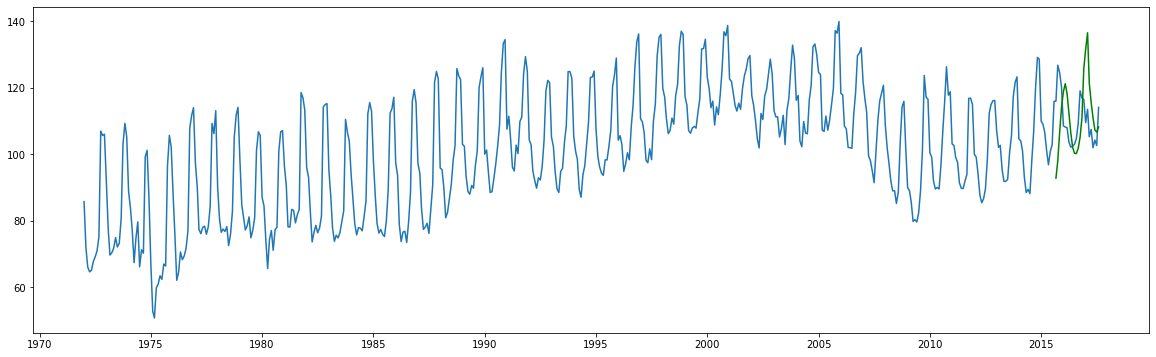

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df_test.index, df_test['candy_production'])
plt.plot(df_test.index, df_test['Predictions'], color ='g')

plt.show()


In [ ]:
train = df

scaler.fit(train)
train = scaler.transform(train)

n_input = 24
n_features =1
generator = TimeseriesGenerator(train, train, length =n_input, batch_size=12)

model.fit_generator(generator, epochs= 300)


pred_list =[]

batch = train[-n_input:].reshape((1, n_input, n_features))


for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis =1)


  ...
    to  
  ['...']
Train for 44 steps
Epoch 1/300
44/44 [==============================] - 4s 90ms/step - loss: 0.0022 - mean_absolute_error: 0.0361
Epoch 2/300
44/44 [==============================] - 4s 82ms/step - loss: 0.0018 - mean_absolute_error: 0.0326
Epoch 3/300
44/44 [==============================] - 4s 82ms/step - loss: 0.0018 - mean_absolute_error: 0.0320
Epoch 4/300
44/44 [==============================] - 4s 90ms/step - loss: 0.0018 - mean_absolute_error: 0.0324A: 3s - loss
Epoch 5/300
44/44 [==============================] - 4s 91ms/step - loss: 0.0018 - mean_absolute_error: 0.0330
Epoch 6/300
44/44 [==============================] - 4s 81ms/step - loss: 0.0017 - mean_absolute_error: 0.0317
Epoch 7/300
44/44 [==============================] - 4s 84ms/step - loss: 0.0018 - mean_absolute_error: 0.0331
Epoch 8/300
44/44 [==============================] - 4s 86ms/step - loss: 0.0017 - mean_absolute_error: 0.0319
Epoch 9/300
44/44 [==============================] - 4s 

44/44 [==============================] - 3s 76ms/step - loss: 0.0015 - mean_absolute_error: 0.0306
Epoch 69/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0017 - mean_absolute_error: 0.0318
Epoch 70/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0015 - mean_absolute_error: 0.0300
Epoch 71/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0015 - mean_absolute_error: 0.0303
Epoch 72/300
44/44 [==============================] - 4s 80ms/step - loss: 0.0015 - mean_absolute_error: 0.0303
Epoch 73/300
44/44 [==============================] - 3s 77ms/step - loss: 0.0016 - mean_absolute_error: 0.0305
Epoch 74/300
44/44 [==============================] - 3s 78ms/step - loss: 0.0013 - mean_absolute_error: 0.0281: 2s - loss: 0.0014 - m
Epoch 75/300
44/44 [==============================] - 3s 79ms/step - loss: 0.0015 - mean_absolute_error: 0.0295
Epoch 76/300
44/44 [==============================] - 3s 77ms/step - loss: 0.0014 - mean_absol

44/44 [==============================] - 3s 75ms/step - loss: 0.0015 - mean_absolute_error: 0.0300
Epoch 140/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0012 - mean_absolute_error: 0.0272
Epoch 141/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0012 - mean_absolute_error: 0.0271
Epoch 142/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0013 - mean_absolute_error: 0.0277
Epoch 143/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0012 - mean_absolute_error: 0.0267
Epoch 144/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0013 - mean_absolute_error: 0.0271
Epoch 145/300
44/44 [==============================] - 3s 75ms/step - loss: 0.0013 - mean_absolute_error: 0.0277
Epoch 146/300
44/44 [==============================] - 3s 74ms/step - loss: 0.0012 - mean_absolute_error: 0.0269
Epoch 147/300
44/44 [==============================] - 3s 76ms/step - loss: 0.0011 - mean_absolute_error: 0.02

44/44 [==============================] - 3s 72ms/step - loss: 0.0013 - mean_absolute_error: 0.0284
Epoch 212/300
44/44 [==============================] - 3s 72ms/step - loss: 0.0011 - mean_absolute_error: 0.0265
Epoch 213/300
44/44 [==============================] - 3s 72ms/step - loss: 0.0011 - mean_absolute_error: 0.0260
Epoch 214/300
44/44 [==============================] - 3s 71ms/step - loss: 0.0010 - mean_absolute_error: 0.0249
Epoch 215/300
44/44 [==============================] - 3s 71ms/step - loss: 0.0012 - mean_absolute_error: 0.0263
Epoch 216/300
44/44 [==============================] - 3s 71ms/step - loss: 0.0013 - mean_absolute_error: 0.0275
Epoch 217/300
44/44 [==============================] - 3s 72ms/step - loss: 0.0011 - mean_absolute_error: 0.0263
Epoch 218/300
44/44 [==============================] - 3s 71ms/step - loss: 0.0012 - mean_absolute_error: 0.0267
Epoch 219/300
44/44 [==============================] - 3s 71ms/step - loss: 0.0011 - mean_absolute_error: 0.02

44/44 [==============================] - 3s 72ms/step - loss: 9.1379e-04 - mean_absolute_error: 0.0236
Epoch 283/300
44/44 [==============================] - 3s 71ms/step - loss: 9.4049e-04 - mean_absolute_error: 0.0234
Epoch 284/300
44/44 [==============================] - 3s 71ms/step - loss: 8.7355e-04 - mean_absolute_error: 0.0228
Epoch 285/300
44/44 [==============================] - 3s 71ms/step - loss: 9.0873e-04 - mean_absolute_error: 0.0235
Epoch 286/300
44/44 [==============================] - 3s 71ms/step - loss: 9.9558e-04 - mean_absolute_error: 0.0243
Epoch 287/300
44/44 [==============================] - 3s 71ms/step - loss: 9.0110e-04 - mean_absolute_error: 0.0230
Epoch 288/300
44/44 [==============================] - 3s 71ms/step - loss: 9.8618e-04 - mean_absolute_error: 0.0240
Epoch 289/300
44/44 [==============================] - 4s 89ms/step - loss: 9.4815e-04 - mean_absolute_error: 0.0238
Epoch 290/300
44/44 [==============================] - 5s 109ms/step - loss: 8

In [ ]:
# model for the prediction for the next 24 months i.e 2years from the earlier predicted

In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,36)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index =future_dates[-n_input:].index, columns=['Predictions'])

df_proj =pd.concat([df, df_predict], axis=1)

In [ ]:
df_proj.tail(36)


,candy_production,Predictions
2016-09-01,109.3191,NaN
2016-10-01,119.0502,NaN
2016-11-01,116.8431,NaN
2016-12-01,116.4535,NaN
2017-01-01,109.4666,NaN
2017-02-01,113.4661,NaN
2017-03-01,105.2245,NaN
2017-04-01,107.4288,NaN
2017-05-01,101.9209,NaN
2017-06-01,104.2022,NaN


No handles with labels found to put in legend.


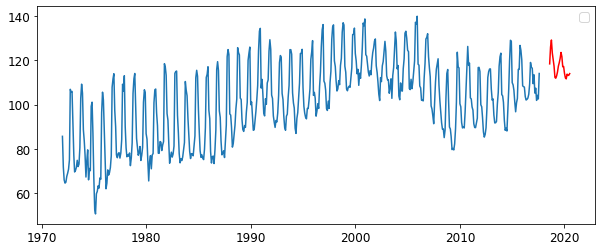

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['candy_production'])
plt.plot(df_proj.index, df_proj['Predictions'], color ='r')
plt.legend(loc='best', fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()